In [1]:
%matplotlib inline
import numpy as np # numpy 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

In [2]:
def sigmoid(x): # Define sigmoid function
    return 1/(1+np.exp(-x))

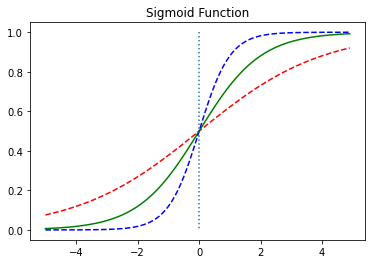

In [5]:
x = np.arange(-5.0, 5.0, 0.1) # -5 ~ 5 범위를 0.1 단위 그래프로 표현
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # w = 0.5
plt.plot(x, y2, 'g') # w = 1
plt.plot(x, y3, 'b', linestyle='--') # w = 2
plt.plot([0, 0],[1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

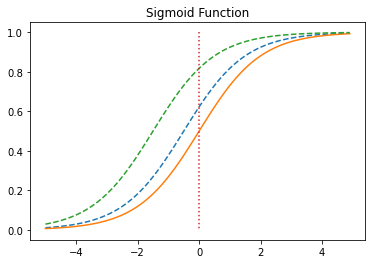

In [8]:
y4 = sigmoid(x + 0.5)
y5 = sigmoid(x)
y6 = sigmoid(x + 1.5)

plt.plot(x, y4, linestyle='--') # b = 0.5
plt.plot(x, y5) # b = 0
plt.plot(x, y6, linestyle='--') # b = 1
plt.plot([0, 0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [10]:
torch.manual_seed(1)

In [11]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [12]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [13]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [16]:
# H(x)를 선언합니다.
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [17]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [19]:
print(torch.sigmoid(x_train.matmul(W) + b))

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


In [20]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [26]:
# 하나의 원소에 대한 오차를 구해보자.
-(y_train[0] * torch.log(hypothesis[0]) + (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward>)

In [27]:
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [28]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [30]:
# 우리는 위에서 비용 함수를 직접 구현하였는데,
# 사실 pytorch에서 logistic regression의 cost function을 이미 제공하고 있습니다.
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

In [34]:
# model initialization
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr = 1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)).mean()
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번 마다 log 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [35]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward>)


In [37]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [38]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)
